In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
import arabic_reshaper
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [74]:
df = pd.read_excel('H:\\Work\\Takhfifan\\Reports\\Details\\After Merge\\98.10\\Total - 1398.10.01 to 1398.10.29.xlsx',dropna = True)
pd.set_option('display.max_columns', None)

In [75]:
df.drop_duplicates(subset = 'mobile').drop(columns = 'log').head()

,request_da,e,Unnamed: 2,Unnamed: 3,Vendor_name,hotel_name,city,product_id,parent_id,firstname,lastname,telephone,mobile,status_label,Canceled_by,cancellation_reason,last_update,total_price,Creation_Update_diff
0,2019-12-21,05:26:01,03:30:00,08:56:01,هتل رضویه مشهد,هتل رضویه مشهد ویژه اقامت تا 36% تخفیف,مشهد,165156,111445,seyed amin,najmjoo,02188925825,09124232733,Cancelled,Customer,عدم پاسخگویی,2019-12-21T05:39:42+03:30,6300000,13
1,2019-12-21,05:41:43,03:30:00,09:11:43,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,153522,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:23+03:30,3960000,98
2,2019-12-21,06:26:36,03:30:00,09:56:36,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342763,09133765013,Cancelled,Customer,درخواست تکراری,2019-12-21T07:54:11+03:30,600000,87
3,2019-12-21,06:28:32,03:30:00,09:58:32,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342764,٠٩١٢٣09123765013,Cancelled,Customer,انصراف-تغییر برنامه,2019-12-21T07:58:44+03:30,600000,90
4,2019-12-21,06:53:35,03:30:00,10:23:35,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,166190,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:46+03:30,6600000,27


In [6]:
df1 = df.groupby(['city','status_label'])['mobile'].count().reset_index()
df1.sort_values('mobile',ascending = False)

,city,status_label,mobile
17,مازندران,Cancelled,468
22,مشهد,Cancelled,424
9,تهران,Cancelled,173
26,هرمزگان,Cancelled,106
19,مازندران,Finalize,88
2,اصفهان,Cancelled,84
36,گیلان,Cancelled,74
24,مشهد,Finalize,56
32,کیش,Cancelled,53
10,تهران,Finalize,42


In [7]:
df1['mobile_bins'] = pd.cut(df1['mobile'],bins = [0,49,99,149,199,249,299,349,399,449,500],labels = ['fist fifty','second fifty','third fifty','forth fifty','fifth fifty','sixth fifty','seventh fifty','eighth fifty','ninth fifty','tenth fifty']) # 'labels' is Optional
df1

,city,status_label,mobile,mobile_bins
0,اردبیل,Cancelled,6,fist fifty
1,اردبیل,Finalize,1,fist fifty
2,اصفهان,Cancelled,84,second fifty
3,اصفهان,Finalize,16,fist fifty
4,اصفهان,Pending,1,fist fifty
5,اصفهان,Processing,4,fist fifty
6,بندرعباس,Cancelled,4,fist fifty
7,تبریز,Cancelled,1,fist fifty
8,تهران,Awaiting Vendor,1,fist fifty
9,تهران,Cancelled,173,forth fifty


In [10]:
df1['mobile_bins'].mode()[0]

'fist fifty'

In [11]:
df1['city'].value_counts()

مازندران    5
مشهد        5
تهران       5
هرمزگان     4
اصفهان      4
گیلان       3
کیش         3
اردبیل      2
یزد         2
رشت         2
زنجان       1
کرج         1
گرگان       1
بندرعباس    1
همدان       1
تبریز       1
Name: city, dtype: int64

In [12]:
df.iloc[:,[8,10,12]]

,parent_id,lastname,mobile
0,111445,najmjoo,09124232733
1,126129,طالبی,09123432562
2,177437,كاتب زاده,09133765013
3,177437,كاتب زاده,٠٩١٢٣09123765013
4,126129,طالبی,09123432562
...,...,...,...
1779,148627,نباتی,09123370372
1780,123056,عمیدخالد,09186717913
1781,148627,دهشت,09173667279
1782,153683,بیک زاده,09126610977


In [13]:
df[df['Canceled_by'] == 'Customer']['parent_id']    #Vlookup

0       111445
1       126129
2       177437
3       177437
4       126129
         ...  
1777    148627
1779    148627
1780    123056
1782    153683
1783    148627
Name: parent_id, Length: 814, dtype: int64

In [26]:
df2 = (df1['mobile'] > 80) & (df1['mobile'] < 140)
#df2 = df1['mobile'].gt(80) & df1['mobile'].lt(140)     # equals to the upper line
df1.where(df2)

,city,status_label,mobile,mobile_bins
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,اصفهان,Cancelled,84.0,second fifty
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [29]:
df['city'].unique()
#df['city'].nunique()

array(['مشهد', 'مازندران', 'هرمزگان', 'رشت', 'گیلان', 'اصفهان', 'تبریز',
       'تهران', 'گرگان', 'اردبیل', 'کرج', 'زنجان', 'همدان', 'بندرعباس',
       'کیش', 'یزد'], dtype=object)

In [37]:
df3 = df1.set_index(['city','status_label'])
#df3
df3.loc[[('اردبیل','Cancelled'),('اردبیل','Finalize')]]

mobile mobile_bins
city   status_label                    
اردبیل Cancelled          6  fist fifty
       Finalize           1  fist fifty

In [66]:
df4 = df.copy()
df4['Vendor_type'] = df4['Vendor_name'].replace(to_replace = '[ ].*',value = '',regex = True)   
#def splitt(x):
#    x['Vendor_type'] = str(x['Vendor_name']).split(' ')[0]
#    return x
#df4 = df4.apply(splitt,axis = 'columns')
df4.head()

,request_da,Unnamed: 2,Unnamed: 3,Vendor_name,hotel_name,city,product_id,parent_id,firstname,lastname,telephone,mobile,status_label,Canceled_by,cancellation_reason,last_update,total_price,Creation_Update_diff,log,Vendor_type
0,2019-12-21,03:30:00,08:56:01,هتل رضویه مشهد,هتل رضویه مشهد ویژه اقامت تا 36% تخفیف,مشهد,165156,111445,seyed amin,najmjoo,02188925825,09124232733,Cancelled,Customer,عدم پاسخگویی,2019-12-21T05:39:42+03:30,6300000,13,"[{""message"":""These fields are edited: status, ...",هتل
1,2019-12-21,03:30:00,09:11:43,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,153522,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:23+03:30,3960000,98,"[{""message"":""These fields are edited: status, ...",هتل
2,2019-12-21,03:30:00,09:56:36,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342763,09133765013,Cancelled,Customer,درخواست تکراری,2019-12-21T07:54:11+03:30,600000,87,"[{""message"":""These fields are edited: status, ...",هتل
3,2019-12-21,03:30:00,09:58:32,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342764,٠٩١٢٣09123765013,Cancelled,Customer,انصراف-تغییر برنامه,2019-12-21T07:58:44+03:30,600000,90,"[{""message"":""These fields are edited: agent_co...",هتل
4,2019-12-21,03:30:00,10:23:35,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,166190,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:46+03:30,6600000,27,"[{""message"":""These fields are edited: product_...",هتل


In [76]:
del([df['e'],df['log']])
df.head()

,request_da,Unnamed: 2,Unnamed: 3,Vendor_name,hotel_name,city,product_id,parent_id,firstname,lastname,telephone,mobile,status_label,Canceled_by,cancellation_reason,last_update,total_price,Creation_Update_diff
0,2019-12-21,03:30:00,08:56:01,هتل رضویه مشهد,هتل رضویه مشهد ویژه اقامت تا 36% تخفیف,مشهد,165156,111445,seyed amin,najmjoo,02188925825,09124232733,Cancelled,Customer,عدم پاسخگویی,2019-12-21T05:39:42+03:30,6300000,13
1,2019-12-21,03:30:00,09:11:43,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,153522,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:23+03:30,3960000,98
2,2019-12-21,03:30:00,09:56:36,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342763,09133765013,Cancelled,Customer,درخواست تکراری,2019-12-21T07:54:11+03:30,600000,87
3,2019-12-21,03:30:00,09:58:32,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342764,٠٩١٢٣09123765013,Cancelled,Customer,انصراف-تغییر برنامه,2019-12-21T07:58:44+03:30,600000,90
4,2019-12-21,03:30:00,10:23:35,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,166190,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:46+03:30,6600000,27


In [77]:
df['date'] = pd.to_datetime(df['request_da'])
df.head()

,request_da,Unnamed: 2,Unnamed: 3,Vendor_name,hotel_name,city,product_id,parent_id,firstname,lastname,telephone,mobile,status_label,Canceled_by,cancellation_reason,last_update,total_price,Creation_Update_diff,date
0,2019-12-21,03:30:00,08:56:01,هتل رضویه مشهد,هتل رضویه مشهد ویژه اقامت تا 36% تخفیف,مشهد,165156,111445,seyed amin,najmjoo,02188925825,09124232733,Cancelled,Customer,عدم پاسخگویی,2019-12-21T05:39:42+03:30,6300000,13,2019-12-21
1,2019-12-21,03:30:00,09:11:43,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,153522,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:23+03:30,3960000,98,2019-12-21
2,2019-12-21,03:30:00,09:56:36,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342763,09133765013,Cancelled,Customer,درخواست تکراری,2019-12-21T07:54:11+03:30,600000,87,2019-12-21
3,2019-12-21,03:30:00,09:58:32,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342764,٠٩١٢٣09123765013,Cancelled,Customer,انصراف-تغییر برنامه,2019-12-21T07:58:44+03:30,600000,90,2019-12-21
4,2019-12-21,03:30:00,10:23:35,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,166190,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:46+03:30,6600000,27,2019-12-21


In [78]:
df.rename(mapper = lambda x:x.upper(),axis = 1)

,REQUEST_DA,UNNAMED: 2,UNNAMED: 3,VENDOR_NAME,HOTEL_NAME,CITY,PRODUCT_ID,PARENT_ID,FIRSTNAME,LASTNAME,TELEPHONE,MOBILE,STATUS_LABEL,CANCELED_BY,CANCELLATION_REASON,LAST_UPDATE,TOTAL_PRICE,CREATION_UPDATE_DIFF,DATE
0,2019-12-21,03:30:00,08:56:01,هتل رضویه مشهد,هتل رضویه مشهد ویژه اقامت تا 36% تخفیف,مشهد,165156,111445,seyed amin,najmjoo,02188925825,09124232733,Cancelled,Customer,عدم پاسخگویی,2019-12-21T05:39:42+03:30,6300000,13,2019-12-21
1,2019-12-21,03:30:00,09:11:43,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,153522,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:23+03:30,3960000,98,2019-12-21
2,2019-12-21,03:30:00,09:56:36,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342763,09133765013,Cancelled,Customer,درخواست تکراری,2019-12-21T07:54:11+03:30,600000,87,2019-12-21
3,2019-12-21,03:30:00,09:58:32,هتل آپارتمان فاخته مشهد,هتل آپارتمان فاخته مشهد ویژه یک شب اقامت تا ...,مشهد,177452,177437,محمد,كاتب زاده,02166342764,٠٩١٢٣09123765013,Cancelled,Customer,انصراف-تغییر برنامه,2019-12-21T07:58:44+03:30,600000,90,2019-12-21
4,2019-12-21,03:30:00,10:23:35,هتل رویای شیرین رامسر,هر شب اقامت در هتل رویای شیرین تا ۴۷% تخفیف,مازندران,166190,126129,رضا,طالبی,02126303957,09123432562,Cancelled,Customer,انصراف-قیمت بالا,2019-12-21T07:20:46+03:30,6600000,27,2019-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,2020-01-18,03:30:00,23:54:10,هتل توچال,یک شب اقامت، صبحانه، بلیت تله کابین، بلیت تله ...,تهران,183833,148627,محمد,نباتی,02155493157,09123370372,Cancelled,Customer,درخواست تکراری,2020-01-18T20:41:57+03:30,4003500,17,2020-01-18
1780,2020-01-18,03:30:00,1900-01-01 00:59:25,ویلا نرگس رامسر,ویلا دوخوابه حیاط دار نرگس تا ۶۴% تخفیف,مازندران,141069,123056,حسین,عمیدخالد,NaN,09186717913,Cancelled,Customer,عدم پاسخگویی,2020-01-20T08:49:33+03:30,12500000,2120,2020-01-18
1781,2020-01-18,03:30:00,1900-01-01 01:14:46,هتل توچال,یک شب اقامت، صبحانه، بلیت تله کابین، بلیت تله ...,تهران,183833,148627,پرنیان,دهشت,NaN,09173667279,Cancelled,Vendor,عدم ظرفیت,2020-01-19T05:18:18+03:30,4003500,453,2020-01-18
1782,2020-01-18,03:30:00,1900-01-01 01:27:25,ویلا کاج کلاردشت,واحد دوخوابه به سبک قاجار کاج در دل جنگل تا ۷۶...,مازندران,153684,153683,مرتضی,بیک زاده,02634429182,09126610977,Cancelled,Customer,انصراف-تغییر برنامه,2020-01-19T07:50:27+03:30,3400000,593,2020-01-18


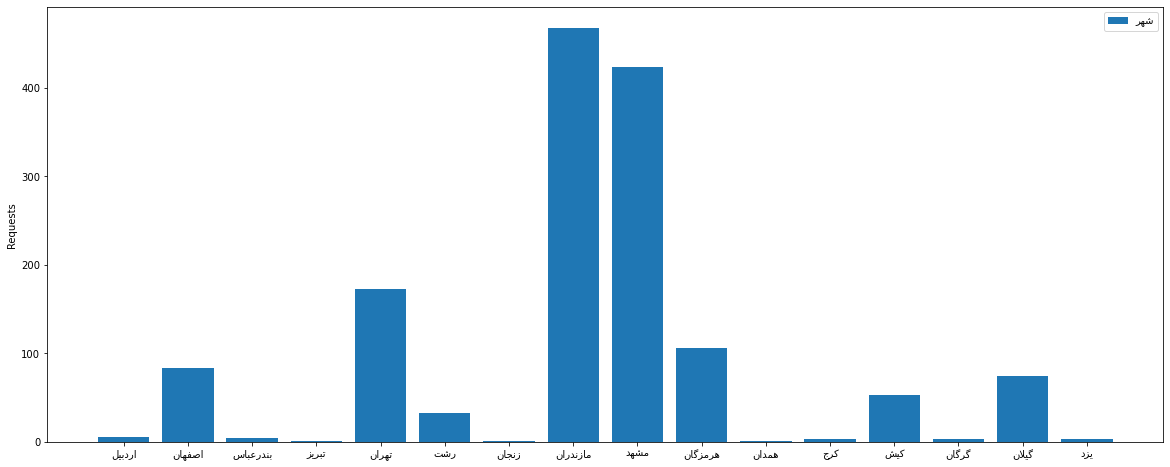

In [285]:
# requests by city
plt.figure(figsize = (20,8))
x1 = [get_display(reshape(i)) for i in df1['city']]
plt.bar(x1,df1['mobile'])
plt.ylabel('Requests')
plt.legend([get_display(reshape(i)) for i in ['شهر']])
# plt.savefig('C:\\Users\\Iman\\Desktop\\fig.jpg',dpi = 500)
plt.show()